# Regresión Polinomial

Predicción de las ventas de la siguiente semana para Walmart.
Base de datos de 45 tiendas tipo A, B. Varían en tamaño

In [1]:
from numpy.random import seed
seed(1)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Lectura del los datos del 2011

In [3]:
walmart2011 = pd.read_csv('walmart2011e.csv')
walmart2012 = pd.read_csv('walmart2012e.csv')

In [4]:
# Visualiza los primeros registros
walmart2011.head()

,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Weekly_Sales
0,0.0,48.27,2.976,0.0,0.0,0.0,0.0,0.0,211.404742,7.742,0.0,15984.24
1,1.0,35.40,2.983,0.0,0.0,0.0,0.0,0.0,211.457411,7.742,0.0,17359.70
2,2.0,44.04,3.016,0.0,0.0,0.0,0.0,0.0,211.827234,7.742,0.0,17341.47
3,3.0,43.83,3.010,0.0,0.0,0.0,0.0,0.0,212.197058,7.742,0.0,18461.18
4,4.0,42.27,2.989,0.0,0.0,0.0,0.0,0.0,212.566881,7.742,0.0,21665.76


In [5]:
# Visualiza los nombres de las variables
walmart2011

,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Weekly_Sales
0,0.0,48.27,2.976,0.00,0.00,0.00,0.00,0.00,211.404742,7.742,0.0,15984.24
1,1.0,35.40,2.983,0.00,0.00,0.00,0.00,0.00,211.457411,7.742,0.0,17359.70
2,2.0,44.04,3.016,0.00,0.00,0.00,0.00,0.00,211.827234,7.742,0.0,17341.47
3,3.0,43.83,3.010,0.00,0.00,0.00,0.00,0.00,212.197058,7.742,0.0,18461.18
4,4.0,42.27,2.989,0.00,0.00,0.00,0.00,0.00,212.566881,7.742,0.0,21665.76
5,5.0,36.39,3.022,0.00,0.00,0.00,0.00,0.00,212.936705,7.742,1.0,37887.17
6,6.0,57.36,3.045,0.00,0.00,0.00,0.00,0.00,213.247885,7.742,0.0,46845.87
7,7.0,62.90,3.065,0.00,0.00,0.00,0.00,0.00,213.535609,7.742,0.0,19363.83
8,8.0,59.58,3.288,0.00,0.00,0.00,0.00,0.00,213.823333,7.742,0.0,20327.61
9,9.0,53.56,3.459,0.00,0.00,0.00,0.00,0.00,214.111056,7.742,0.0,21280.40


In [6]:
# Concatenación de los dataframes
walmart = pd.concat([walmart2011, walmart2012])

## Pre-procesamiento de los datos

In [7]:
#Estandarización
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()
scaler.fit(walmart)
walmartStd = scaler.transform(walmart)
walmartStd

array([[-1.66738218, -1.46301262, -2.06948479, ...,  0.63298245,
        -0.25964539, -0.65141356],
       [-1.59631833, -2.38393912, -2.04096118, ...,  0.63298245,
        -0.25964539, -0.50326489],
       [-1.52525449, -1.76569476, -1.90649271, ...,  0.63298245,
        -0.25964539, -0.50522841],
       ...,
       [ 1.17517156, -0.40970741,  0.47726657, ..., -2.234481  ,
        -0.25964539,  0.07882502],
       [ 1.2462354 , -0.05335822,  0.44874295, ..., -2.234481  ,
        -0.25964539,  0.23190674],
       [ 1.31729924,  0.03179349,  0.09016036, ..., -2.234481  ,
        -0.25964539,  0.57717052]])

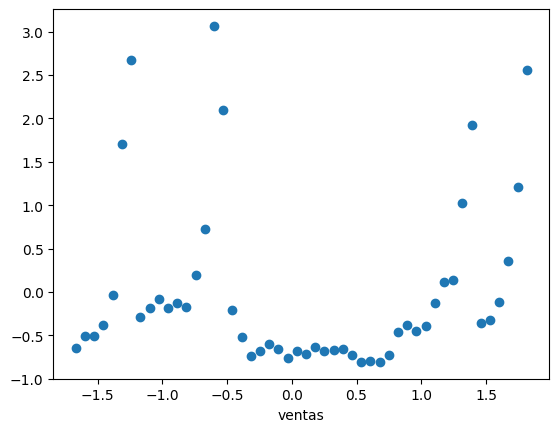

In [8]:
# Grafica de las ventas
plt.scatter(walmartStd[0:50, 0], walmartStd[0:50, -1])
plt.xlabel('tiempo')
plt.xlabel('ventas')
plt.show()

Creación de conjuntos de entrenamiento y test

In [9]:
caracteristicas = walmartStd[:,:-1]
target = walmartStd[:, -1]
caracteristicas.shape

(95, 11)

In [10]:
x_train, x_test, y_train, y_test = train_test_split(caracteristicas, target, test_size=0.1)

In [11]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(85, 11)
(85,)
(10, 11)
(10,)


Generación del modelo

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import optimizers, backend, callbacks
from sklearn.metrics import r2_score

In [13]:
backend.clear_session()

# from tensorflow.keras import regularizers

# Modelo
modelo1 = Sequential()
modelo1.add(Dense(8, activation='sigmoid', input_shape=(11,)))
modelo1.add(Dropout(0.3))  # Adding dropout layer
modelo1.add(Dense(1, activation='linear'))
modelo1.summary()
# Fin del modelo

Metal device set to: Apple M2 Max
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 96        
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 105
Trainable params: 105
Non-trainable params: 0
_________________________________________________________________


2024-03-15 00:44:24.613415: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-03-15 00:44:24.613540: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [14]:
#Define el optimizador Adam
Adam = optimizers.Adam(learning_rate = 0.001)

#Compila el modelo
modelo1.compile(optimizer=Adam, loss='mean_squared_error', metrics=['mse'])

#Checkpointer para guardar el mejor modelo (en alguna epoca)
checkpointer = callbacks.ModelCheckpoint('walmart1.h5', monitor = 'val_mse', save_best_only = True,
                                         mode = 'min')

In [15]:
# custom callback to print epoch
class VerboseEpoch(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % 100 == 0:
            print("Epoch", epoch + 1, "- Training Loss:", logs['loss'], "- Training Accuracy:", logs['mse'], "- Validation Loss:", logs['val_loss'], "- Validation Accuracy:", logs['val_mse'])

# Entrena el modelo
M = modelo1.fit(x_train, y_train, validation_data=(x_test, y_test),
                epochs=1000, batch_size=6,
                verbose=0, callbacks=[VerboseEpoch(), checkpointer])

2024-03-15 00:44:24.731634: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-03-15 00:44:24.844093: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-03-15 00:44:25.187771: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 100 - Training Loss: 0.712896466255188 - Training Accuracy: 0.712896466255188 - Validation Loss: 1.9111108779907227 - Validation Accuracy: 1.9111108779907227
Epoch 200 - Training Loss: 0.6820378303527832 - Training Accuracy: 0.6820378303527832 - Validation Loss: 1.7763240337371826 - Validation Accuracy: 1.7763240337371826
Epoch 300 - Training Loss: 0.6272053718566895 - Training Accuracy: 0.6272053718566895 - Validation Loss: 1.7132713794708252 - Validation Accuracy: 1.7132713794708252
Epoch 400 - Training Loss: 0.6202222108840942 - Training Accuracy: 0.6202222108840942 - Validation Loss: 1.6427104473114014 - Validation Accuracy: 1.6427104473114014
Epoch 500 - Training Loss: 0.60659259557724 - Training Accuracy: 0.60659259557724 - Validation Loss: 1.6202127933502197 - Validation Accuracy: 1.6202127933502197
Epoch 600 - Training Loss: 0.5882531404495239 - Training Accuracy: 0.5882531404495239 - Validation Loss: 1.639488935470581 - Validation Accuracy: 1.639488935470581
Epoch 700 - 

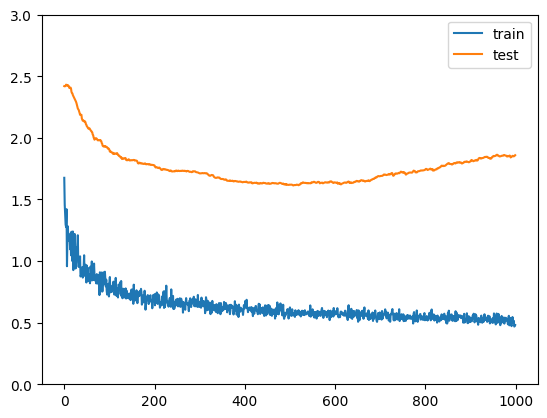

3/3 [==============================] - 0s 5ms/step


2024-03-15 00:45:34.720132: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


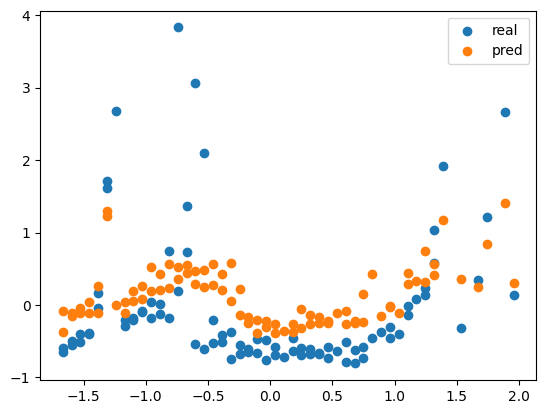

3/3 [==============================] - 0s 2ms/step
r2:  0.3602558853632396
error (mse):  <keras.engine.sequential.Sequential object at 0x2a21600d0>
1/1 [==============================] - 0s 16ms/step


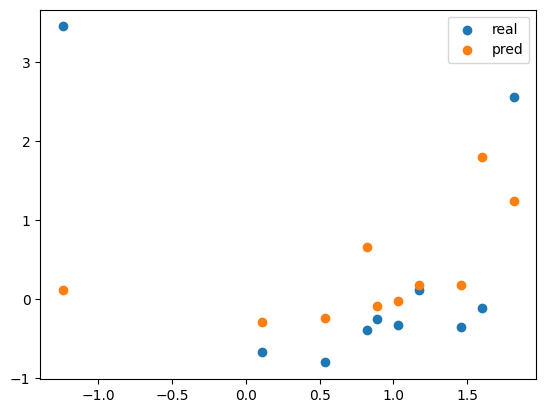

1/1 [==============================] - 0s 9ms/step
r2:  0.023870776795319126
error (mse):  <keras.engine.sequential.Sequential object at 0x2a21600d0>


In [16]:
# Evaluación del modelo
# Grafica del error
plt.plot(M.history['loss'], label='train')
plt.plot(M.history['val_loss'], label='test')
plt.legend(loc='best')
plt.ylim(0,3)
plt.show()

# Evaluación en entrenamiento
plt.scatter(x_train[:, 0], y_train, label='real')
plt.scatter(x_train[:, 0], modelo1.predict(x_train), label='pred')
plt.legend(loc='best')
plt.show()
print('r2: ', r2_score(y_train, modelo1.predict(x_train)))
print('error (mse): ', modelo1)

# Evaluación en validación
plt.scatter(x_test[:, 0], y_test, label='real')
plt.scatter(x_test[:, 0], modelo1.predict(x_test), label='pred')
plt.legend(loc='best')
plt.show()
print('r2: ',r2_score(y_test, modelo1.predict(x_test)))
print('error (mse): ', modelo1)